KÜTÜPHANELERİ YÜKLE

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import lightgbm as lgb

VERİ SETİNİ YÜKLE

In [3]:
#veri setini yükle
df = pd.read_csv("loan_data.csv")

VERİ SETİNİ İNCELE

In [4]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

KATEGORİK SÜTUNLARI İNCELE

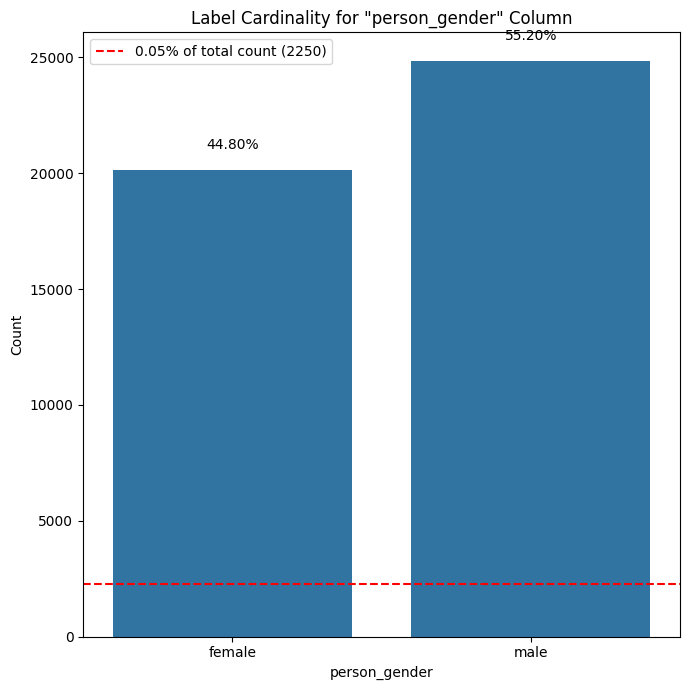

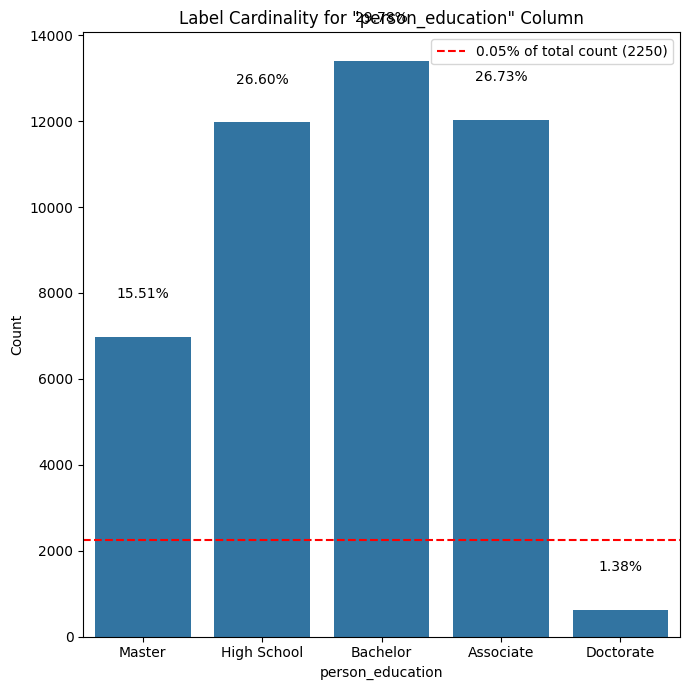

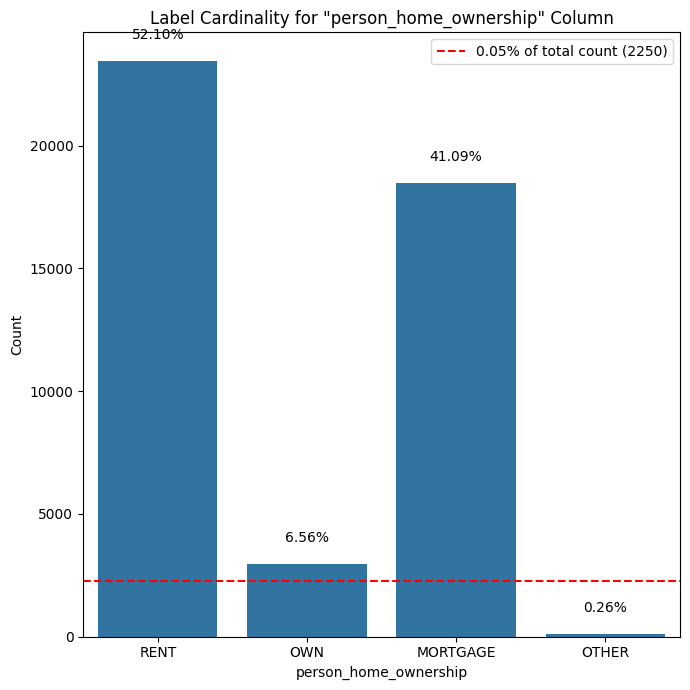

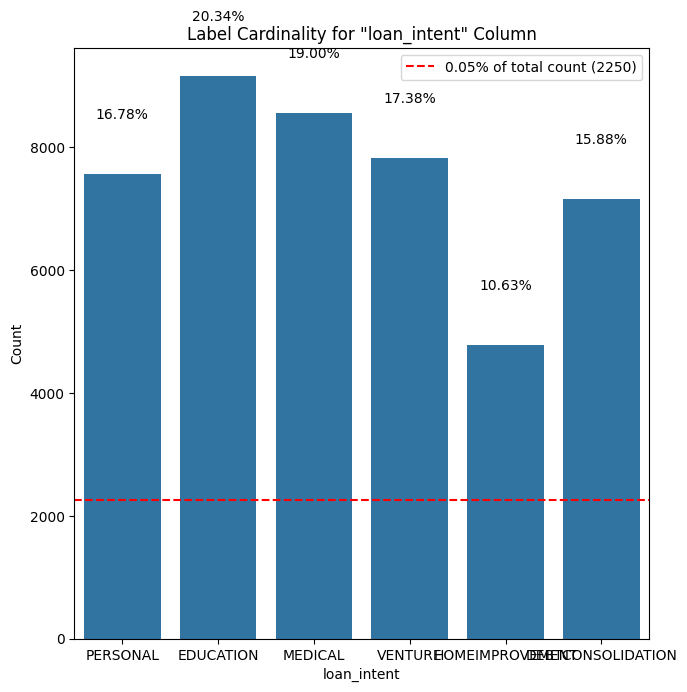

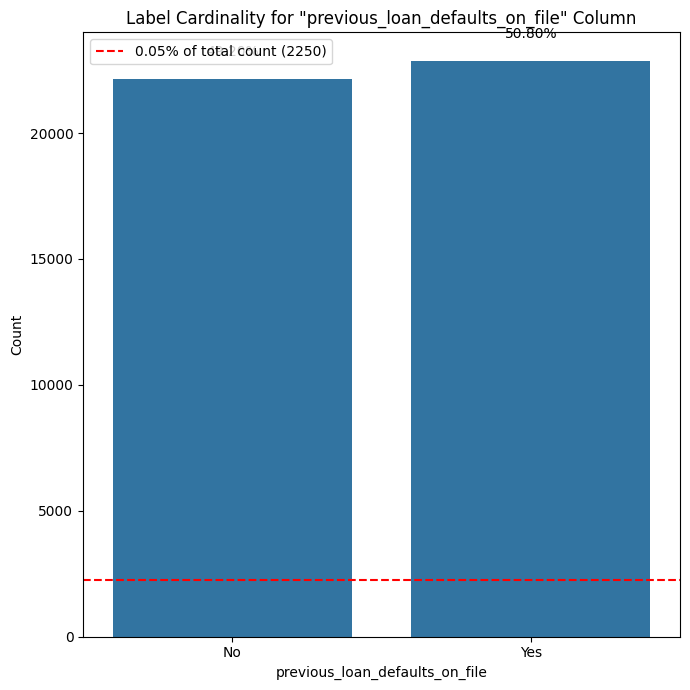

In [6]:
# Kategorik sütunları belirleyin
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

def plot_categorical_column(dataframe, column):

    plt.figure(figsize=(7, 7))
    ax = sns.countplot(x=dataframe[column])
    total_count = len(dataframe[column])
    threshold = 0.05 * total_count
    category_counts = dataframe[column].value_counts(normalize=True) * 100
    ax.axhline(threshold, color='red', linestyle='--', label=f'0.05% of total count ({threshold:.0f})')
    
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total_count) * 100
        ax.text(p.get_x() + p.get_width() / 2., height + 0.02 * total_count, f'{percentage:.2f}%', ha="center")
    
    plt.title(f'Label Cardinality for "{column}" Column')
    plt.ylabel('Count')
    plt.xlabel(column)
    plt.tight_layout()
    
    plt.legend()
    plt.show()

for col in categorical_columns:
    plot_categorical_column(df, col)


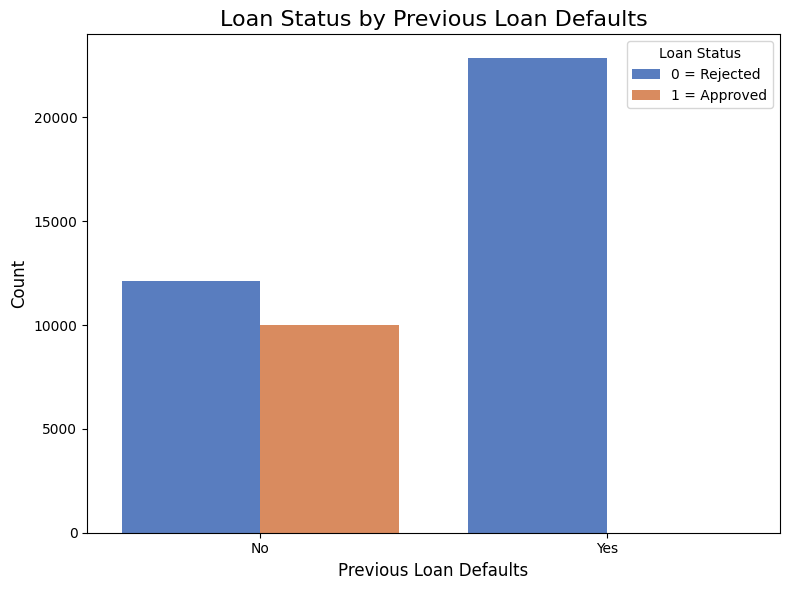

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='previous_loan_defaults_on_file', hue='loan_status', palette='muted')
plt.title("Loan Status by Previous Loan Defaults", fontsize=16)
plt.xlabel("Previous Loan Defaults", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title='Loan Status', labels=['0 = Rejected', '1 = Approved'])
plt.tight_layout()

# Show the plot
plt.show()

In [6]:
df['person_education'] = df['person_education'].replace('Doctorate', 'Master')
df = df[df['person_home_ownership'] != "OTHER"]

In [7]:
# Her kategorik sütun için benzersiz olmayan değerleri ve tekrar sayılarını yazdır
for column in categorical_columns:
    print(df[column].value_counts())

person_gender
male      24774
female    20109
Name: count, dtype: int64
person_education
Bachelor       13358
Associate      11993
High School    11943
Master          7589
Name: count, dtype: int64
person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
Name: count, dtype: int64
loan_intent
EDUCATION            9135
MEDICAL              8527
VENTURE              7792
PERSONAL             7530
DEBTCONSOLIDATION    7128
HOMEIMPROVEMENT      4771
Name: count, dtype: int64
previous_loan_defaults_on_file
Yes    22811
No     22072
Name: count, dtype: int64


SAYISAL SÜTUNLARI İNCELE

In [8]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
person_age,44883.0,27.766437,6.044170,20.00,24.00,26.00,30.00,144.00
person_income,44883.0,80289.958938,80381.826287,8000.00,47183.00,67041.00,95786.00,7200766.00
person_emp_exp,44883.0,5.411737,6.062883,0.00,1.00,4.00,8.00,125.00
loan_amnt,44883.0,9578.728204,6315.241951,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,44883.0,11.003930,2.979520,5.42,8.59,11.01,12.99,20.00
loan_percent_income,44883.0,0.139674,0.087199,0.00,0.07,0.12,0.19,0.66
cb_person_cred_hist_length,44883.0,5.868814,3.879523,2.00,3.00,4.00,8.00,30.00
credit_score,44883.0,632.621282,50.432148,390.00,601.00,640.00,670.00,850.00
loan_status,44883.0,0.221933,0.415551,0.00,0.00,0.00,0.00,1.00


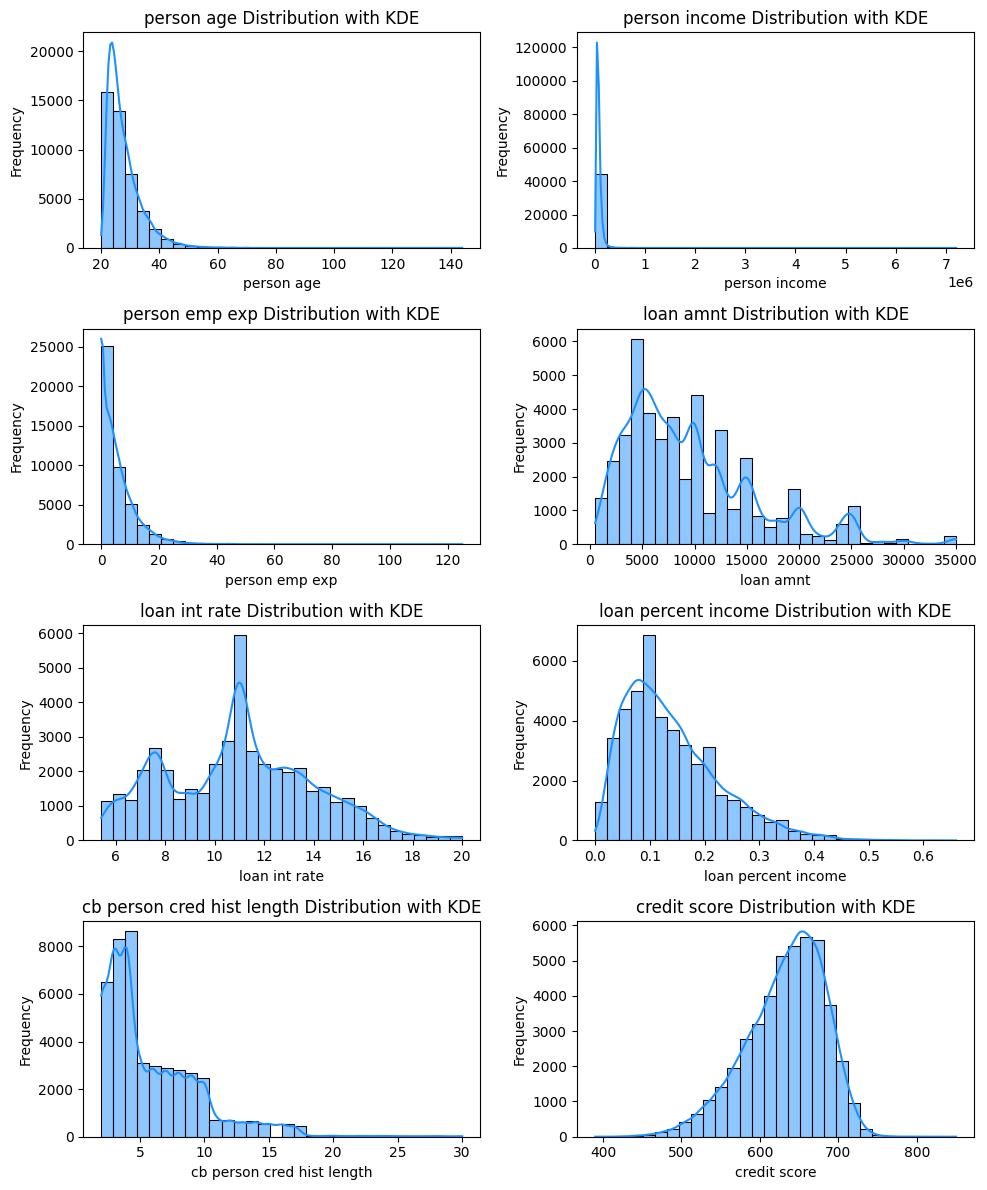

In [9]:
def univariate_analysis(data, columns):
    plt.figure(figsize=(10, 12))  
    
    for i, column in enumerate(columns, 1):
        plt.subplot(4, 2, i)  
        sns.histplot(data[column], kde=True, bins=30, color='dodgerblue')
        plt.title(f'{column.replace("_", " ")} Distribution with KDE')
        plt.xlabel(column.replace('_', ' '))
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

columns_to_analyze = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

univariate_analysis(df, columns_to_analyze)

In [10]:
df = df[df['person_age'] <= 60]
df = df[df['person_emp_exp'] <= 40]
df = df[df['cb_person_cred_hist_length'] <= 20]
df = df[df['loan_percent_income'] != 0]

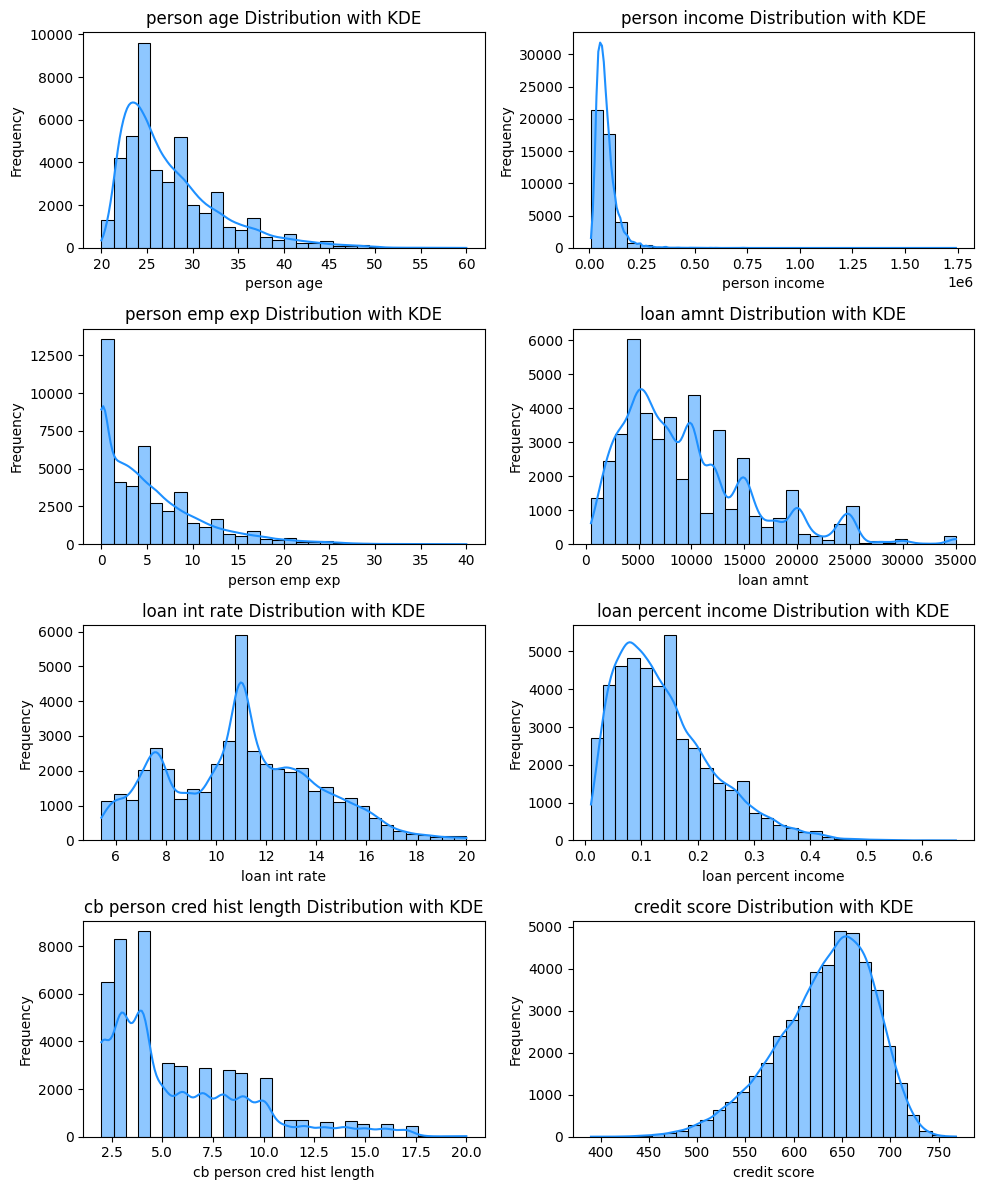

In [11]:
def univariate_analysis(data, columns):
    plt.figure(figsize=(10, 12))  
    
    for i, column in enumerate(columns, 1):
        plt.subplot(4, 2, i)  
        sns.histplot(data[column], kde=True, bins=30, color='dodgerblue')
        plt.title(f'{column.replace("_", " ")} Distribution with KDE')
        plt.xlabel(column.replace('_', ' '))
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

columns_to_analyze = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

univariate_analysis(df, columns_to_analyze)

FEATURE ENGINEERING

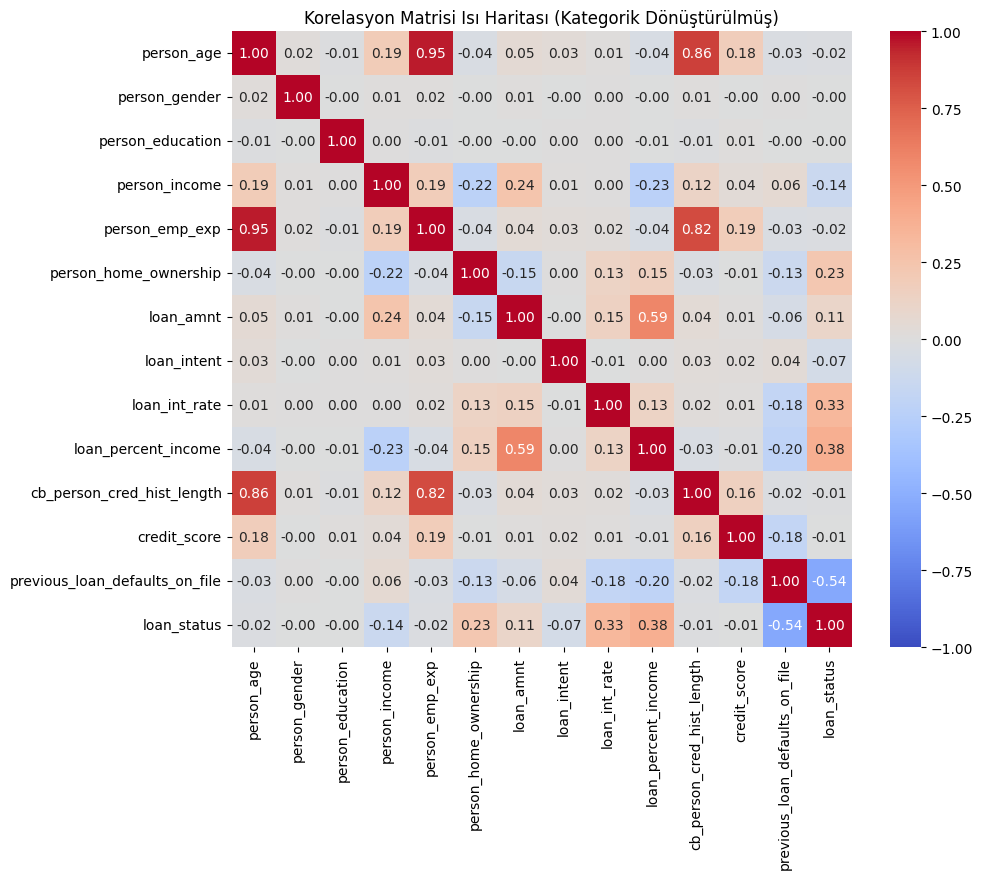

In [9]:
# Kategorik sütunları belirle
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Kategorik sütunları sayısal verilere dönüştürme (Label Encoding yöntemi)
df_encoded = df.copy()
for col in categorical_columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Korelasyon matrisini hesapla
correlation_matrix = df_encoded.corr()

# Korelasyonları bir ısı haritası ile görselleştir
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Korelasyon Matrisi Isı Haritası (Kategorik Dönüştürülmüş)")
plt.show()


In [13]:
#person_age ve person_emp_exp'in korelasyonları yüksek olduğu için birleştirip orijinal sütunları sildik.
df['age_emp_exp_ratio'] = df['person_age'] / (df['person_emp_exp'] + 1)
df.drop(['person_age', 'person_emp_exp'], axis=1, inplace=True)

#Bazen çoklu özelliklerin etkileşimi, tek başına özelliklerden daha fazla bilgi verebilir.
#Kredi miktarının ve faiz oranının gelir üzerindeki etkisinin bir birleşimini verir.
df['loan_intensity'] = df['loan_amnt'] * df['loan_int_rate'] * df['loan_percent_income']

#normalleştirme
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['person_income', 'loan_amnt', 'credit_score']] = scaler.fit_transform(df[['person_income', 'loan_amnt', 'credit_score']])


Sınıf Dengesizliğini Giderme

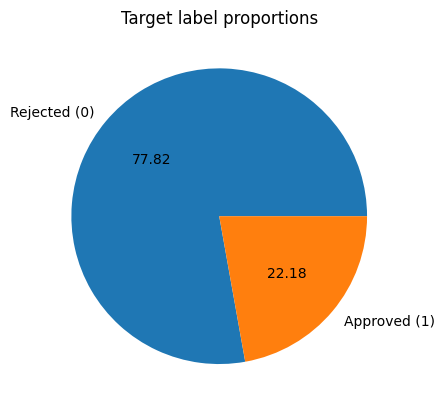

In [15]:
label_prop = df['loan_status'].value_counts()

plt.pie(label_prop.values, labels=['Rejected (0)', 'Approved (1)'], autopct='%.2f')
plt.title('Target label proportions')
plt.show()

In [6]:
from sklearn.utils import resample
import pandas as pd


# Baskın sınıf ve eksik sınıfı ayırma
majority_class = df[df['loan_status'] == 0]
minority_class = df[df['loan_status'] == 1]

# Eksik sınıfı yeniden örnekleme (oversampling)
minority_oversampled = resample(minority_class, 
                                replace=True,  # Örneklerin tekrar edilmesine izin ver
                                n_samples=len(majority_class),  # Baskın sınıf kadar örnek oluştur
                                random_state=42)  # Rastgelelik için sabit bir değer

# Dengeyi sağlamak için veri setini birleştir
balanced_df = pd.concat([majority_class, minority_oversampled])

# Sonuçları kontrol et
print(balanced_df['loan_status'].value_counts())

loan_status
0    35000
1    35000
Name: count, dtype: int64


In [ ]:
df= balanced_df
df

MACHINE LEARNING

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report,roc_curve,auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import cross_val_score
import category_encoders as ce
import joblib

In [19]:


# Kategorik değişkenleri sayısallaştırma
label_encoders = {}
categorical_columns = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

# Label Encoding işlemi ve kaydetme
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Kategorik değişkenleri sayısallaştır
    label_encoders[col] = le
    # LabelEncoder'ı dosyaya kaydet
    joblib.dump(le, f"{col}_label_encoder.pkl") 

# Özellikler ve hedef değişkeni ayırma
X = df.drop('loan_status', axis=1)  # Özellikler
y = df['loan_status']  # Hedef değişken

# Eğitim ve test setlerine ayırma
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)


LogisticRegression Modeli

In [20]:
logreg = LogisticRegression(max_iter=2000,random_state=42)
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

c:\Users\Berke\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
accuracy=accuracy_score(Y_pred, Y_pred)
conf_matrix=confusion_matrix(Y_test, Y_pred)
class_report=classification_report(Y_test, Y_pred)

print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

logreg_probs = logreg.predict_proba(X_test)[:, 1]
fpr_cb, tpr_cb, _ = roc_curve(Y_test, Y_pred)
roc_auc_cb = auc(fpr_cb, tpr_cb)

Accuracy: 1.0000

Confusion Matrix:
[[5602 1304]
 [ 469 6507]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      6906
           1       0.83      0.93      0.88      6976

    accuracy                           0.87     13882
   macro avg       0.88      0.87      0.87     13882
weighted avg       0.88      0.87      0.87     13882



precision: kesinlik
recall : hassasiyet

LogisticRegression ROC AUC: 0.87


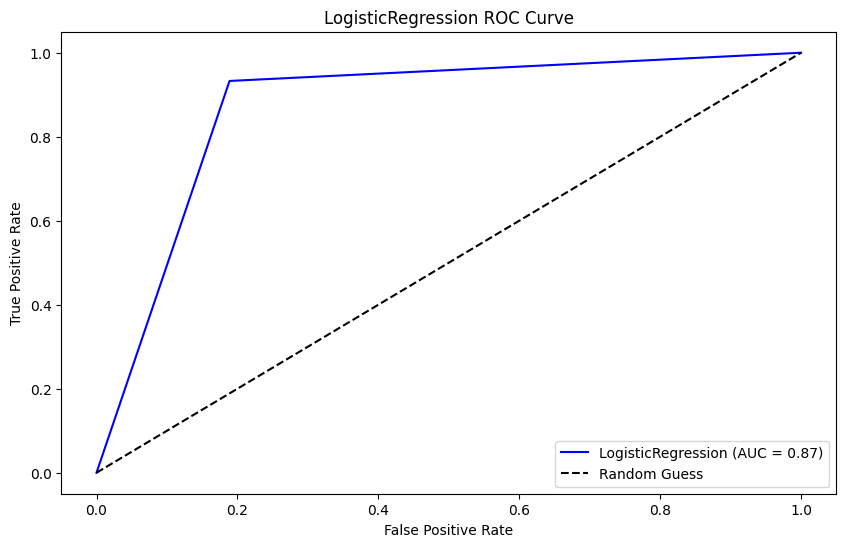

In [24]:

print(f"LogisticRegression ROC AUC: {roc_auc_cb:.2f}")
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(fpr_cb, tpr_cb, label=f'LogisticRegression (AUC = {roc_auc_cb:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LogisticRegression ROC Curve')
plt.legend()
plt.show()


Catboost Modeli

In [20]:
catboost_model = CatBoostClassifier(iterations=2000, learning_rate=0.1, depth=6, verbose=0)
catboost_model.fit(X_train, Y_train)

#model tahimini
catboost_predictions = catboost_model.predict(X_test)
catboost_accuracy = accuracy_score(Y_test, catboost_predictions)

class_report=classification_report(Y_test, catboost_predictions)

conf_matrix=confusion_matrix(Y_test, catboost_predictions)

print(f"CatBoost Doğruluk (Accuracy): {catboost_accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
#roc egirisi
catboost_probs = catboost_model.predict_proba(X_test)[:, 1]
fpr_cb, tpr_cb, _ = roc_curve(Y_test, catboost_probs)
roc_auc_cb = auc(fpr_cb, tpr_cb)


CatBoost Doğruluk (Accuracy): 0.96

Confusion Matrix:
[[6516  390]
 [  99 6877]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      6906
           1       0.95      0.99      0.97      6976

    accuracy                           0.96     13882
   macro avg       0.97      0.96      0.96     13882
weighted avg       0.97      0.96      0.96     13882



CatBoost ROC AUC: 0.99


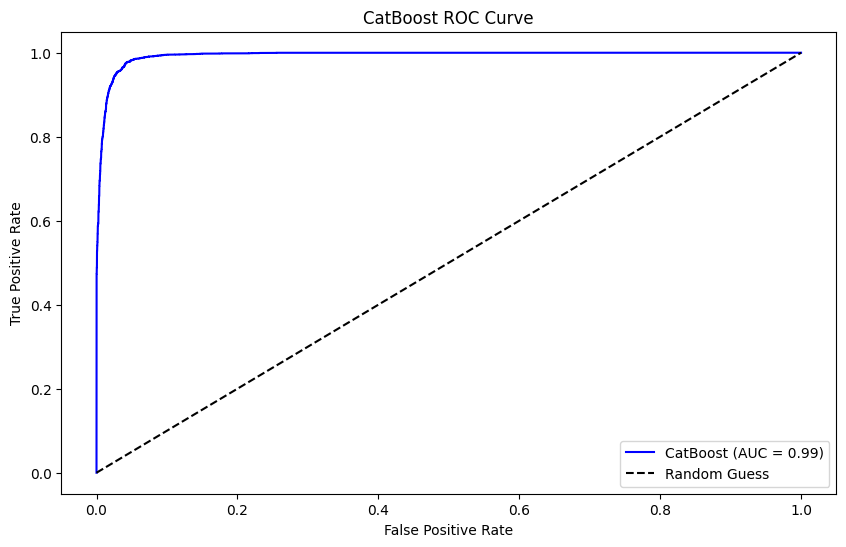

In [21]:

print(f"CatBoost ROC AUC: {roc_auc_cb:.2f}")
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(fpr_cb, tpr_cb, label=f'CatBoost (AUC = {roc_auc_cb:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CatBoost ROC Curve')
plt.legend()
plt.show()


XGBoost Modeli

In [27]:
# XGBoost modelini eğitme
xgboost_model = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.1, max_depth=6, use_label_encoder=False, eval_metric='logloss')
xgboost_model.fit(X_train, Y_train)

#model tahimini
xgboost_predictions = xgboost_model.predict(X_test)
xgboost_accuracy = accuracy_score(Y_test, xgboost_predictions)
class_report=classification_report(Y_test, xgboost_predictions)
conf_matrix=confusion_matrix(Y_test, xgboost_predictions)
print(f"XGBoost Doğruluk (Accuracy): {xgboost_accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
#roc egirisi
xgboost_probs = xgboost_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(Y_test, xgboost_probs)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)


c:\Users\Berke\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:48:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Doğruluk (Accuracy): 0.97

Confusion Matrix:
[[6559  347]
 [  77 6899]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      6906
           1       0.95      0.99      0.97      6976

    accuracy                           0.97     13882
   macro avg       0.97      0.97      0.97     13882
weighted avg       0.97      0.97      0.97     13882



XGBoost ROC AUC: 0.99


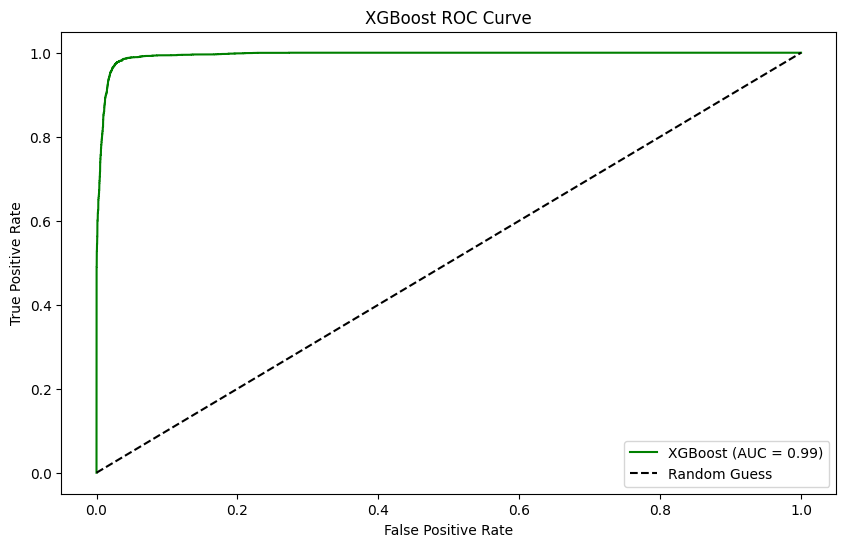

In [28]:

print(f"XGBoost ROC AUC: {roc_auc_xgb:.2f}")


plt.figure(figsize=(10, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend()
plt.show()


In [22]:
import tkinter as tk
from tkinter import messagebox, ttk
import joblib

In [23]:
model = catboost_model # Modelinizi doğru dosya adıyla değiştirin

# Verinizin özellikleri
CREDIT_SCORE = 2.907685e-16  # Belirlediğiniz sabit kredi skoru

# Kategorik değişken sınıfları
categorical_columns = [
    "person_gender", "person_education", "person_home_ownership", 
    "loan_intent", "previous_loan_defaults_on_file"
]

categorical_classes = {
    "person_gender": ["male", "female"],
    "person_education": ["Bachelor", "Associate", "High School", "Master"],
    "person_home_ownership": ["RENT", "MORTGAGE", "OWN"],
    "loan_intent": ["EDUCATION", "MEDICAL", "VENTURE", "PERSONAL", "DEBTCONSOLIDATION", "HOMEIMPROVEMENT"],
    "previous_loan_defaults_on_file": ["Yes", "No"]
}

numerical_columns = [
    "person_income", "loan_amnt", "loan_int_rate", 
    "cb_person_cred_hist_length", "age", "emp_exp"
]

In [24]:
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = joblib.load(f"{col}_label_encoder.pkl")  # Kaydedilen dosyadan yükle


In [25]:
def predict():
    try:
        # Kategorik girişleri alma ve dönüştürme
        cat_values = [cat_var.get() for cat_var in categorical_vars]
        encoded_cat_values = [
            label_encoders[col].transform([value])[0]
            for col, value in zip(categorical_columns, cat_values)
        ]

        # Sayısal girişleri alma
        num_values = [float(entry.get()) for entry in numerical_entries]
        dftest = pd.DataFrame([num_values], columns=['person_income', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length', 'age', 'emp_exp'])

        dftest[['person_income', 'loan_amnt']] = scaler.fit_transform(dftest[['person_income', 'loan_amnt']])
        
        num_values = dftest.iloc[0].values
        


        # Hesaplamalar
        person_income = num_values[0]
        loan_amnt = num_values[1]
        loan_int_rate = num_values[2]
        cb_person_cred_hist_length = num_values[3]
        age = num_values[4]
        emp_exp = num_values[5]

        

        # 1. Loan Percent Income
        loan_percent_income = loan_amnt / person_income

        # 2. Age to Employment Experience Ratio
        age_emp_exp_ratio = age / emp_exp

        # 3. Loan Intensity
        loan_intensity = person_income * loan_percent_income * loan_amnt

        # Doğru sırada input_data oluşturma
        input_data = np.array([
            encoded_cat_values[0],  # person_gender
            encoded_cat_values[1],  # person_education
            person_income,          # person_income
            encoded_cat_values[2],  # person_home_ownership
            loan_amnt,              # loan_amnt
            encoded_cat_values[3],  # loan_intent
            loan_int_rate,          # loan_int_rate
            loan_percent_income,    # loan_percent_income
            cb_person_cred_hist_length,  # cb_person_cred_hist_length
            CREDIT_SCORE,           # credit_score
            encoded_cat_values[4],  # previous_loan_defaults_on_file
            age_emp_exp_ratio,      # age_emp_exp_ratio
            loan_intensity          # loan_intensity
        ]).reshape(1, -1)

        # Model ile tahmin yapma
        prediction = model.predict(input_data)
        if prediction[0] == 1:
            result = "Onaylandı" 
        else:    
            result = "Reddedildi"

        # Tahmin sonucunu gösterme
        messagebox.showinfo("Tahmin Sonucu", f"Kredi Durumu Tahmini: {result}")

    except ValueError:
        messagebox.showerror("Hata", "Lütfen tüm alanları doğru şekilde doldurun.")
    except Exception as e:
        messagebox.showerror("Hata", f"Bir hata oluştu: {e}")

In [35]:
import tkinter as tk
from tkinter import ttk

window = tk.Tk()
window.title("Model Tahmin Arayüzü")
window.geometry("800x600")

# Font ayarları
label_font = ("Arial", 20)  # Label ve metin için yazı tipi ve boyut
button_font = ("Arial", 25, "bold")  # Buton için yazı tipi ve boyut

# Scrollable yapı oluşturma
main_frame = tk.Frame(window)
main_frame.pack(fill=tk.BOTH, expand=True)

canvas = tk.Canvas(main_frame)
canvas.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)

scrollbar = tk.Scrollbar(main_frame, orient=tk.VERTICAL, command=canvas.yview)
scrollbar.pack(side=tk.RIGHT, fill=tk.Y)

canvas.configure(yscrollcommand=scrollbar.set)
canvas.bind("<Configure>", lambda e: canvas.configure(scrollregion=canvas.bbox("all")))

content_frame = tk.Frame(canvas)
canvas.create_window((0, 0), window=content_frame, anchor="n")  # 'n' ile üst merkeze hizalama

# Mouse tekerleği ile kaydırmayı etkinleştirme
def on_mouse_wheel(event):
    canvas.yview_scroll(-1 * int(event.delta / 120), "units")

# Mouse tekerleği olaylarını bağlama
window.bind_all("<MouseWheel>", on_mouse_wheel)  # Windows ve Linux
window.bind_all("<Button-4>", lambda e: canvas.yview_scroll(-1, "units"))  # Linux (bazı dağıtımlar)
window.bind_all("<Button-5>", lambda e: canvas.yview_scroll(1, "units"))  # Linux (bazı dağıtımlar)
window.bind_all("<Shift-MouseWheel>", lambda e: canvas.xview_scroll(-1 * int(e.delta / 120), "units"))  # Yatay kaydırma
canvas.bind_all("<MouseWheel>", on_mouse_wheel)  # MacOS

# Kategorik değişkenler
categorical_vars = []

# Kategorik giriş alanlarını oluşturma
for label_text, col in zip(categorical_classes.keys(), categorical_classes.values()):
    label = tk.Label(content_frame, text=label_text.replace("_", " ").capitalize(), font=label_font)
    label.pack(pady=5, anchor="w")  # Solda hizalama

    selected_value = tk.StringVar()
    selected_value.set(col[0])  # Varsayılan seçenek
    dropdown = ttk.Combobox(content_frame, textvariable=selected_value, values=col, state="readonly", font=label_font)
    dropdown.pack(pady=5, anchor="w")  # Solda hizalama
    categorical_vars.append(selected_value)

# Sayısal giriş alanlarını oluşturma
numerical_entries = []
for col in numerical_columns:
    label = tk.Label(content_frame, text=f"{col.replace('_', ' ').capitalize()}:", font=label_font)
    label.pack(pady=5, anchor="w")  # Solda hizalama
    entry = tk.Entry(content_frame, font=label_font)
    entry.pack(pady=5, anchor="w")  # Solda hizalama
    numerical_entries.append(entry)

# Tahmin Butonu
predict_button = tk.Button(content_frame, text="Tahmin Yap", command=predict, font=button_font)
predict_button.pack(pady=20)  # Ortalanmış görünüm

# Uygulamayı başlat
window.mainloop()
